# Box Office Movie Budget / Profit and Return Ratio Scrapping and Plotting.

Introduction

This notebook shares coding to extract Movie Budget, Gross Income and Profit / return ratio from Website. 

In [1]:
import requests
from bs4 import BeautifulSoup

html = requests.get('https://www.the-numbers.com/movie/budgets/all')

In [2]:
#bs = BeautifulSoup(html.content,'html.parser')
bs = BeautifulSoup(html.content.decode('utf-8'),"lxml")  # Using this fixed the ' read as â\x80\x99 problem


In [3]:
# Extract the Table content from website using beautifulshoup and store in soup_list. 
import requests
#from bs4 import BeautifulSoup
#html = requests.get('https://www.the-numbers.com/movie/budgets/all')
import re

soup_list = bs.findAll("tr")
soup_list.pop(0)
len(soup_list)

#soup_list[5].text
#soup_list[5].text.encode('utf-8')

100

In [4]:
# Extract the Table, store in array and input to python dataframe. 
# Generate additional derieved column = Total Gross, Profit and Return Ratio.

import pandas as pd

index_name = []
release_date = []
movie_name = []
prod_budget = []
domestic_gross = []
worldwide_gross = []
total_gross = []
profit = []
return_ratio = []
# 	Pirates of the Caribbean: At World’s End
for tr in soup_list:
    #td = tr.find_all('td',{'class':'data'})
    td = tr.find_all('td')
    index_name_ =  td[0].text.strip()
    release_date_ = td[1].text.strip()
    movie_name_ = td[2].text.strip()
    prod_budget_ = int(td[3].text.strip().replace("$","").replace(",",""))
    domestic_gross_ = int(td[4].text.strip().replace("$","").replace(",",""))
    worldwide_gross_ = int(td[5].text.strip().replace("$","").replace(",",""))
    total_gross_ = domestic_gross_ + worldwide_gross_ # Assume total gross = Local + world wite gross. 
    profit_ = total_gross_ - prod_budget_ # profit = gross income - prod budget. 
    return_ratio_ = profit_/prod_budget_
    
    index_name.append(index_name_) 
    release_date.append(release_date_)
    movie_name.append(movie_name_)
    prod_budget.append(prod_budget_)
    domestic_gross.append(domestic_gross_)
    worldwide_gross.append(worldwide_gross_)
    total_gross.append(total_gross_)
    profit.append(profit_)
    return_ratio.append(return_ratio_)
    
#print(index_name)


df = pd.DataFrame(list(zip(index_name, release_date, movie_name, prod_budget, domestic_gross, worldwide_gross, total_gross, profit, return_ratio)),
               columns =['Index', 'Release Date', 'Movie', 'Production Budget', 'Domestic Gross', 'WorldWide Gross', 'Total Gross Income', 'RevenueOrProfit', 'Return Ratio ROI'])
df

,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross Income,RevenueOrProfit,Return Ratio ROI
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
...,...,...,...,...,...,...,...,...,...
95,96,"Oct 25, 2019",Terminator: Dark Fate,185000000,62253077,250372367,312625444,127625444,0.689867
96,97,"Jul 28, 2021",The Suicide Squad,185000000,55817425,167120232,222937657,37937657,0.205068
97,98,"May 22, 2019",Aladdin,182000000,355559216,1046649706,1402208922,1220208922,6.704445
98,99,"Oct 25, 2017",Thor: Ragnarok,180000000,315058289,850482778,1165541067,985541067,5.475228


In [5]:
df.head()

,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross Income,RevenueOrProfit,Return Ratio ROI
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584


In [6]:
# ## Output to html, but not used as not nice. 
# pd.set_option('colheader_justify', 'center')   # FOR TABLE <th>

# html_string = '''
# <html>
#   <head><title>HTML Pandas Dataframe with CSS</title></head>
#   <link rel="stylesheet" type="text/css" href="df_style.css"/>
#   <body>
#     {table}
#   </body>
# </html>.
# '''
# #myhtml = df.style.set_properties(**{'font-size': '11pt', 'font-family': 'Calibri','border-collapse': 'collapse','border': '1px solid black'}).render()

# # OUTPUT AN HTML FILE
# with open('myhtml.html', 'w') as f:
#     f.write(html_string.format(table=df.to_html(classes='mystyle')))


In [7]:
df.to_html().replace('\n', '') # Get Code for Django Web Use, remove /n new line as Django dont consume it.
#HTML_with_style(df, '<style>table {{{}}}</style>'.format(my_style))


'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>Index</th>      <th>Release Date</th>      <th>Movie</th>      <th>Production Budget</th>      <th>Domestic Gross</th>      <th>WorldWide Gross</th>      <th>Total Gross Income</th>      <th>RevenueOrProfit</th>      <th>Return Ratio ROI</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>1</td>      <td>Apr 23, 2019</td>      <td>Avengers: Endgame</td>      <td>400000000</td>      <td>858373000</td>      <td>2797800564</td>      <td>3656173564</td>      <td>3256173564</td>      <td>8.140434</td>    </tr>    <tr>      <th>1</th>      <td>2</td>      <td>May 20, 2011</td>      <td>Pirates of the Caribbean: On Stranger Tides</td>      <td>379000000</td>      <td>241071802</td>      <td>1045713802</td>      <td>1286785604</td>      <td>907785604</td>      <td>2.395213</td>    </tr>    <tr>      <th>2</th>      <td>3</td>      <td>Apr 22, 2015</td>      <td>Avengers: Age 

In [8]:
from IPython.display import HTML
HTML(df.to_html(classes='table table-striped'))

,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross Income,RevenueOrProfit,Return Ratio ROI
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
5,6,"May 24, 2007",Pirates of the Caribbean: At World’s End,300000000,309420425,960996492,1270416917,970416917,3.234723
6,7,"Nov 13, 2017",Justice League,300000000,229024295,655945209,884969504,584969504,1.949898
7,8,"Oct 6, 2015",Spectre,300000000,200074175,879500760,1079574935,779574935,2.598583
8,9,"Dec 18, 2019",Star Wars: The Rise of Skywalker,275000000,515202542,1072848487,1588051029,1313051029,4.774731
9,10,"May 23, 2018",Solo: A Star Wars Story,275000000,213767512,393151347,606918859,331918859,1.206978


### Saving the results to a CSV file

In [9]:

display(df.dtypes)


Index                  object
Release Date           object
Movie                  object
Production Budget       int64
Domestic Gross          int64
WorldWide Gross         int64
Total Gross Income      int64
RevenueOrProfit         int64
Return Ratio ROI      float64
dtype: object

In [10]:
#Export to CSV. 

df.to_csv('Movie_Budget.csv', index=False)    

df

,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross Income,RevenueOrProfit,Return Ratio ROI
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
...,...,...,...,...,...,...,...,...,...
95,96,"Oct 25, 2019",Terminator: Dark Fate,185000000,62253077,250372367,312625444,127625444,0.689867
96,97,"Jul 28, 2021",The Suicide Squad,185000000,55817425,167120232,222937657,37937657,0.205068
97,98,"May 22, 2019",Aladdin,182000000,355559216,1046649706,1402208922,1220208922,6.704445
98,99,"Oct 25, 2017",Thor: Ragnarok,180000000,315058289,850482778,1165541067,985541067,5.475228


In [11]:
# Create Total Gross Column
# Create Profit Column.
# Create ROI % Profit  / Budget Ratio Chart. 

df



,Index,Release Date,Movie,Production Budget,Domestic Gross,WorldWide Gross,Total Gross Income,RevenueOrProfit,Return Ratio ROI
0,1,"Apr 23, 2019",Avengers: Endgame,400000000,858373000,2797800564,3656173564,3256173564,8.140434
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,1286785604,907785604,2.395213
2,3,"Apr 22, 2015",Avengers: Age of Ultron,365000000,459005868,1395316979,1854322847,1489322847,4.080337
3,4,"Dec 16, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2064615817,3001278042,2695278042,8.808098
4,5,"Apr 25, 2018",Avengers: Infinity War,300000000,678815482,2048359754,2727175236,2427175236,8.090584
...,...,...,...,...,...,...,...,...,...
95,96,"Oct 25, 2019",Terminator: Dark Fate,185000000,62253077,250372367,312625444,127625444,0.689867
96,97,"Jul 28, 2021",The Suicide Squad,185000000,55817425,167120232,222937657,37937657,0.205068
97,98,"May 22, 2019",Aladdin,182000000,355559216,1046649706,1402208922,1220208922,6.704445
98,99,"Oct 25, 2017",Thor: Ragnarok,180000000,315058289,850482778,1165541067,985541067,5.475228


In [12]:
import csv

def load_csv(filename, delim=','):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f, delimiter=delim)
        for row in reader:
            data.append(row)
    return data


In [13]:
data = load_csv('Movie_Budget.csv')
#print(data)

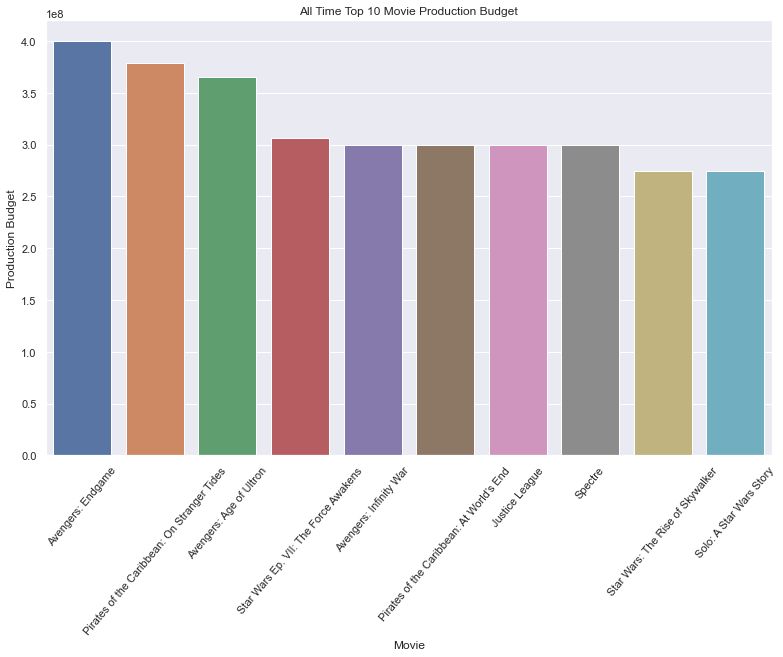

In [14]:
import io
# Plot Graph
import pandas as pd
import matplotlib.pyplot as plt

df = df.sort_values(by=['Production Budget'],ascending=False)

# Simple Plot shows top 10 highest Production Budget Movie.
# df.iloc[0:10].plot(kind='bar',x='Movie',y='Production Budget').set_title("All Time Top 10 Movie Production Budget")
# plt.figure(figsize=(3.841, 7.195), dpi=500)
# plt.savefig('ProductionBudget.png', bbox_inches = 'tight')

import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Movie",y="Production Budget", data=df.iloc[0:10])
g.set_xticklabels(g.get_xticklabels(),rotation=50)

plt.title("All Time Top 10 Movie Production Budget")
plt.savefig('ProductionBudget.png', bbox_inches = 'tight')


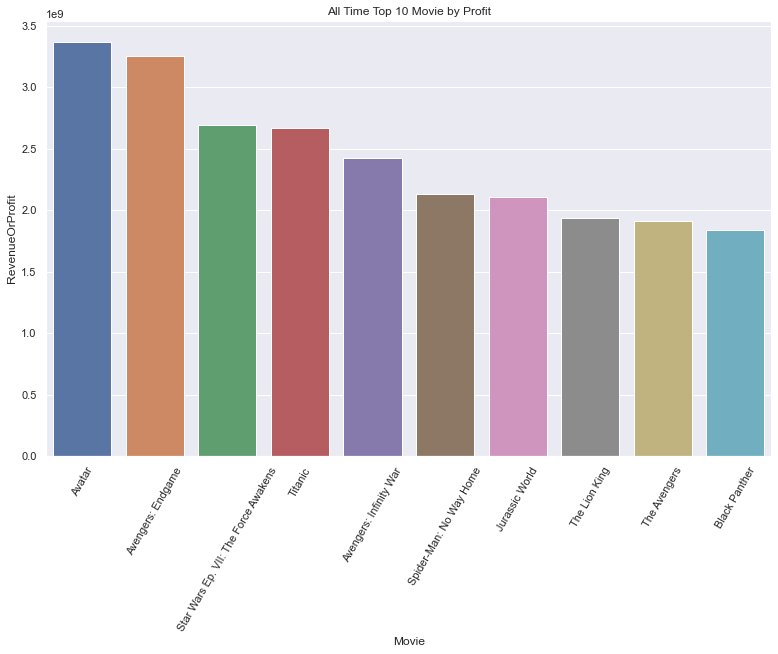

In [15]:
# Plot Graph
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simple Plot shows top 10 highest Profit Movie
# df.sort_values(by=['RevenueOrProfit'],ascending=False).iloc[0:10].plot(kind='bar',x='Movie',y='RevenueOrProfit').set_title("All Time Top 10 Movie by Profit")

# import seaborn as sns
df = df.sort_values(by=['RevenueOrProfit'],ascending=False)
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Movie",y="RevenueOrProfit", data=df.iloc[0:10])
g.set_xticklabels(g.get_xticklabels(),rotation=60)
#class matplotlib.ticker.ScalarFormatter(useOffset=None, useMathText=True, useLocale=None)
#plt.ticklabel_format(useMathText = True)
plt.title("All Time Top 10 Movie by Profit")






plt.savefig('ProductionProfit.png', bbox_inches = 'tight')

#'%1.1fM' % (x * 1e-6)

#####################
# df.sort_values('RevenueOrProfit', ascending = False, inplace= True)
# fig, ax = plt.subplots( figsize=(6,4))
# #ax.bar(range(len(X_train.columns)),clf.feature_importances_ )

# #ax.bar(range(len(df.Movie)),df.Profit )  
# #plt.xticks(range(len(df.Movie)),df.Movie,rotation=90)

# ax.bar(range(len(df.Movie)),df.RevenueOrProfit)
# plt.xticks(range(len(df.Movie)),df.Movie,rotation=90)
# ax.set_title("All Time Top 10 Movie by Profit")
# plt.show()
# plt.savefig('ProductionProfit.png', bbox_inches = 'tight')

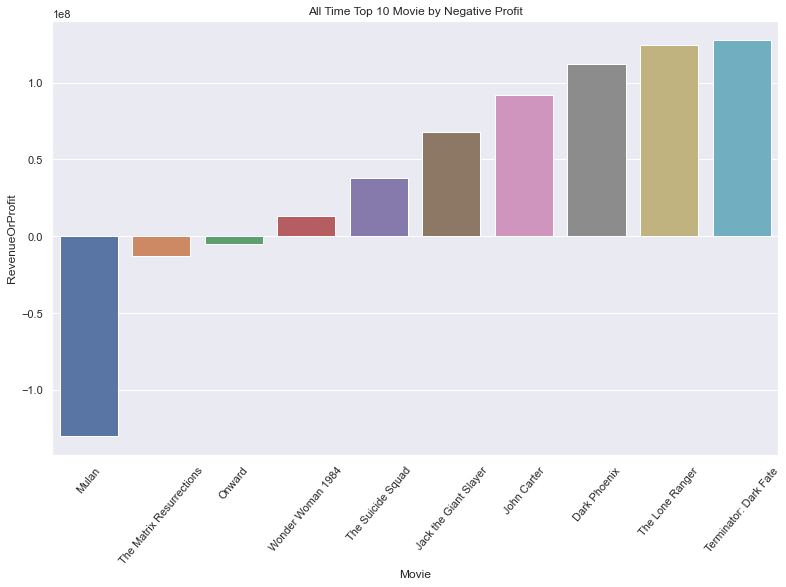

In [16]:
# df.sort_values(by=['RevenueOrProfit'],ascending=True).iloc[0:10].plot(kind='bar',x='Movie',y='RevenueOrProfit').set_title("All Time Top 10 Movie by Profit")

# import seaborn as sns
df = df.sort_values(by=['RevenueOrProfit'],ascending=True)
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Movie",y="RevenueOrProfit", data=df.iloc[0:10])
g.set_xticklabels(g.get_xticklabels(),rotation=50)
plt.title("All Time Top 10 Movie by Negative Profit")


plt.savefig('ProductionNegativeProfit.png', bbox_inches = 'tight')


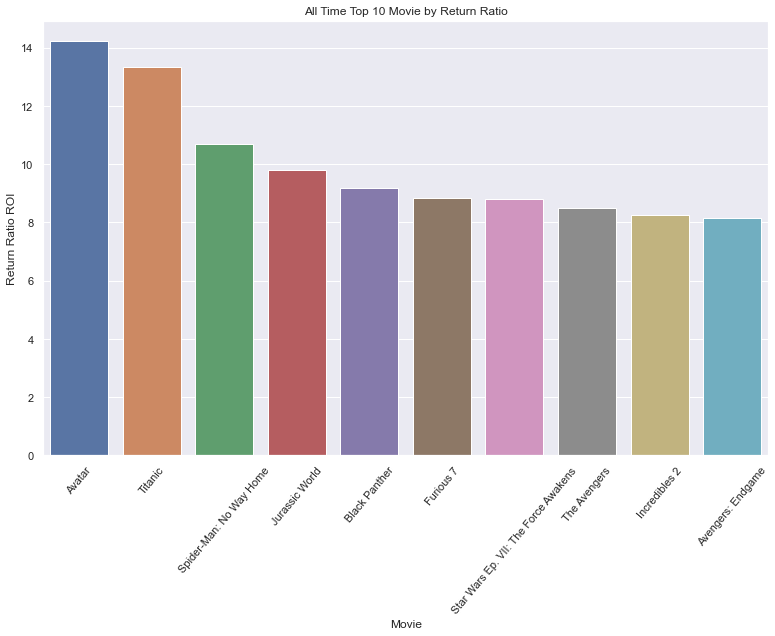

In [17]:
# Plot Graph
import pandas as pd
import matplotlib.pyplot as plt

# Simple Plot shows top 10 highest Profit Movie

# df.sort_values(by=['Return Ratio ROI'],ascending=False).iloc[0:10].plot(kind='bar',x='Movie',y='Return Ratio ROI').set_title("All Time Top 10 Movie by Return Ratio")



df = df.sort_values(by=['Return Ratio ROI'],ascending=False)
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Movie",y="Return Ratio ROI", data=df.iloc[0:10])
g.set_xticklabels(g.get_xticklabels(),rotation=50)
plt.title("All Time Top 10 Movie by Return Ratio")


plt.savefig('HighestReturnRatio.png', bbox_inches = 'tight')



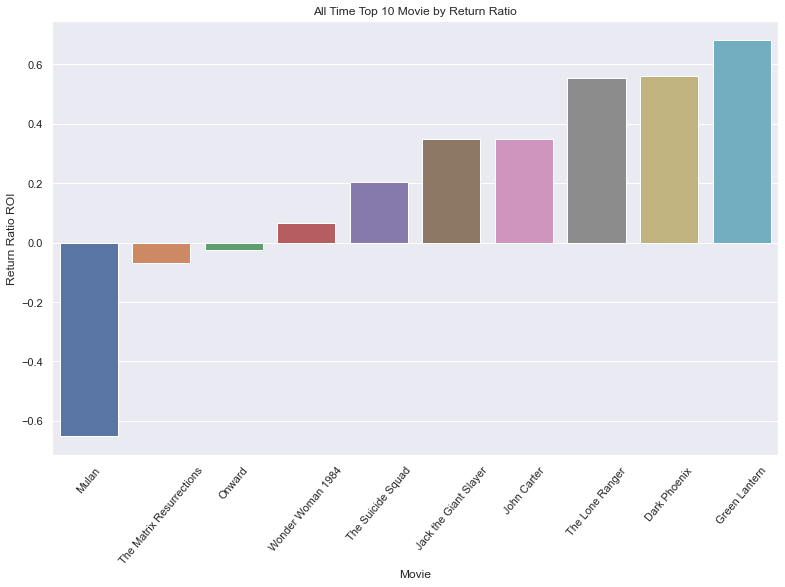

In [18]:
# df.sort_values(by=['Return Ratio ROI'],ascending=True).iloc[0:10].plot(kind='bar',x='Movie',y='Return Ratio ROI').set_title("All Time Top 10 Movie by Lowest Return Ratio")

df = df.sort_values(by=['Return Ratio ROI'],ascending=True)
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Movie",y="Return Ratio ROI", data=df.iloc[0:10])
g.set_xticklabels(g.get_xticklabels(),rotation=50)
plt.title("All Time Top 10 Movie by Return Ratio")



plt.savefig('LowestReturnRatio.png', bbox_inches = 'tight')

